In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.transform import resize
from skimage.filters import gaussian
from skimage.segmentation import active_contour


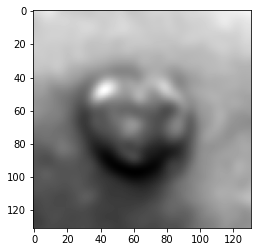

In [51]:
file_im = 'PAT_78_118_164.png'
im = plt.imread(file_im)
im = rgb2gray(im)

#Resize for speed
im = resize(im, (im.shape[0] // 4, im.shape[1] // 4),anti_aliasing=True)

im2 = gaussian(im, 3)
plt.imshow(im2, cmap="gray")

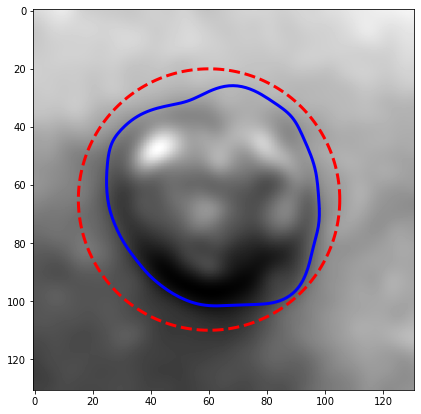

In [52]:
s = np.linspace(0, 2*np.pi, 200)   #Number of points on the circle
r = 65 + 45*np.sin(s)            #Row 
c = 60 + 45*np.cos(s)            #Column
init2 = np.array([r, c]).T



# Run active contour segmentation, the snake will be an array of the same shape as init
snake = active_contour(im2, init2, w_line=0)


# Show
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im2, cmap=plt.cm.gray)
ax.plot(init2[:, 1], init2[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)

plt.show()

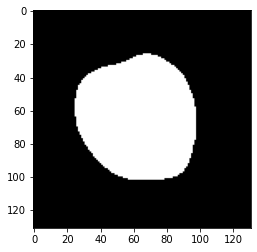

In [53]:
from skimage.draw import polygon

# Create an empty image to add the mask to
mask = np.zeros_like(im2)

# Find coordinates inside the polygon defined by the snake
rr, cc = polygon(snake[:, 0], snake[:, 1], im.shape)

# This is the foreground class
mask[rr, cc] = 1

plt.imshow(mask, cmap="gray")

In [54]:
#Total size of the image
total = mask.shape[0] * mask.shape[1] 

#Size of mask only
area = np.sum(mask)

#As percentage
print(area/total*100)

25.72111182332032
